In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

### Problem Overview and Intentions

#### **Problem Description**
This project focuses on binary classification using a given dataset of images, each labeled as either "cat" or "non-cat". The dataset is divided into training and testing sets. The primary goal is to implement Logistic Regression and utilize various machine learning models to identify the best classifier for the task.

#### **Intentions**
1. **Baseline Logistic Regression Implementation**:
   - Start with a basic implementation of Logistic Regression to establish a performance baseline.
   - Incorporate L2 regularization to reduce overfitting and improve generalization.

2. **Hyperparameter Optimization with GridSearchCV**:
   - Optimize hyperparameters for Logistic Regression, SVM, Random Forest, and Gradient Boosting models using GridSearchCV.
   - Compare the performance of each model to select the most effective one.

3. **Ensemble Learning**:
   - Use a VotingClassifier to combine predictions from Logistic Regression, SVM, Random Forest, and Gradient Boosting models.
   - Enhance model stability and performance through ensemble techniques.


### Data Preprocessing

#### Key Logic
1. Images are stored as 3D arrays (height, width, channels). These are flattened into 2D vectors and normalized to a range of 0 to 1.
2. Labels are reshaped into row vectors of shape (1, m) for compatibility with the model.

#### Code Details
- `flt_norm_dt`: A function to flatten and normalize input datasets and reshape labels.
- `train_x`, `train_y`, `test_x`, `test_y`: Preprocessed training and testing datasets.

### Logistic Regression Implementation

#### Key Logic
1. **Forward Propagation**:
   - Compute probabilities by taking the dot product of weights and input data.
   - Use the Sigmoid function to normalize predictions to a probability range of 0 to 1.

2. **Backward Propagation**:
   - Calculate the cost (loss) using the predicted and actual values.
   - Update weights and biases using Gradient Descent.

3. **L2 Regularization**:
   - Penalize large weights to prevent overfitting and improve model generalization.

#### Code Details
- `logistic_reg`: Implements Logistic Regression with optional L2 regularization.
- `model_eval`: Evaluates model performance on training and testing datasets.



Training on Original Dataset
Iteration 0, Cost: 0.693147
Iteration 100, Cost: 0.584508
Iteration 200, Cost: 0.466949
Iteration 300, Cost: 0.376007
Iteration 400, Cost: 0.331463
Iteration 500, Cost: 0.303273
Iteration 600, Cost: 0.279880
Iteration 700, Cost: 0.260042
Iteration 800, Cost: 0.242941
Iteration 900, Cost: 0.228004
Iteration 1000, Cost: 0.214820
Iteration 1100, Cost: 0.203078
Iteration 1200, Cost: 0.192544
Iteration 1300, Cost: 0.183033
Iteration 1400, Cost: 0.174399
Iteration 1500, Cost: 0.166521
Iteration 1600, Cost: 0.159305
Iteration 1700, Cost: 0.152667
Iteration 1800, Cost: 0.146542
Iteration 1900, Cost: 0.140872
Train Accuracy: 99.043%
Test Accuracy: 70.000%
Misclassified Indices: [ 5  6 10 11 13 18 19 28 29 30 33 34 41 44 46]


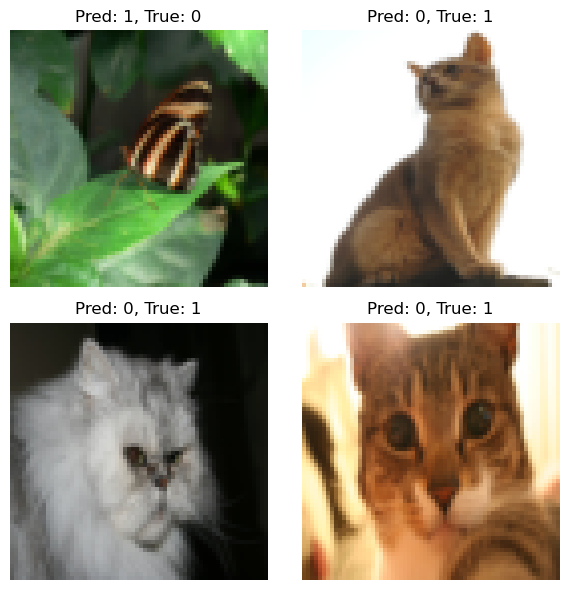

In [4]:
### Original Dataset
## Data sets preparation
def prep_dt(train_file_path, test_file_path):
    with h5py.File(train_file_path, "r") as train_dataset:
        train_set_x = np.array(train_dataset["train_set_x"][:])
        train_set_y = np.array(train_dataset["train_set_y"][:])
        classes = np.array(train_dataset["list_classes"][:])

    with h5py.File(test_file_path, "r") as test_dataset:
        test_set_x = np.array(test_dataset["test_set_x"][:])
        test_set_y = np.array(test_dataset["test_set_y"][:])

    return train_set_x, train_set_y, test_set_x, test_set_y, classes

def flt_norm_dt(X, Y):
    #X: Input dataset (images)
    #Y: Label
    X = X.reshape(X.shape[0], -1).T / 255.0  # Flatten and normalize
    Y = Y.reshape(1, -1)  # Reshape labels to (1, m) -- kinda vectorization
    return X, Y

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_reg(X, Y, iter, learn_rate):
    m = X.shape[1]
    n = X.shape[0]
    w = np.zeros((n, 1))
    b = 0

    costs = []

    for i in range(iter):
        # Forward Propagation
        Z = np.dot(w.T, X) + b
        A = sigmoid(Z)
        cost = -np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / m

        # Backward Propagation
        dZ = A - Y
        dw = np.dot(X, dZ.T) / m
        db = np.sum(dZ) / m

        # Gradient Descent
        w -= learn_rate * dw
        b -= learn_rate * db

        if i % 100 == 0:
            costs.append(cost)
            print(f"Iteration {i}, Cost: {cost:.6f}")

    return w, b, costs


def prediction(w, b, X):
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    return (A > 0.5).astype(int)

# Paths to dataset files
train_file_path = "/Users/aiden/PycharmProjects/pythonProject_AMS 595/train_catvnoncat.h5"
test_file_path = "/Users/aiden/PycharmProjects/pythonProject_AMS 595/test_catvnoncat.h5"


# Load datasets
train_x_orig, train_y_orig, test_x_orig, test_y_orig, classes = prep_dt(train_file_path, test_file_path)

train_x, train_y = flt_norm_dt(train_x_orig, train_y_orig)
test_x, test_y = flt_norm_dt(test_x_orig, test_y_orig)

# For Logistic reg
print("\nTraining on Original Dataset")
w, b, costs = logistic_reg(train_x, train_y, iter=2000, learn_rate=0.005)

train_predictions = prediction(w, b, train_x)
test_predictions = prediction(w, b, test_x)

train_accuracy = np.mean(train_predictions == train_y) * 100
test_accuracy = np.mean(test_predictions == test_y) * 100

print(f"Train Accuracy: {train_accuracy:.3f}%")
print(f"Test Accuracy: {test_accuracy:.3f}%")


mis_images = np.where(test_predictions != test_y)[1]
print(f"Misclassified Indices: {mis_images}")

plt.figure(figsize=(6, 6))
for i, idx in enumerate(mis_images[:4]):  # 4개만 표시
    plt.subplot(2, 2, i + 1)
    plt.imshow(test_x_orig[idx])
    plt.title(f"Pred: {test_predictions[0, idx]}, True: {test_y[0, idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### Results Analysis: Training on Original Dataset

#### Cost Reduction over Iterations
The model's cost function decreases steadily over the iterations:
- **Initial Cost (Iteration 0)**: 0.693147 (reflecting the starting point of training with random initialization).
- **Final Cost (Iteration 1900)**: 0.140872, indicating that the model successfully minimizes the binary cross-entropy loss.

This trend shows that the logistic regression model effectively learns from the training data.

---

#### Training and Testing Accuracy
- **Train Accuracy**: **99.043%**
  - The high training accuracy demonstrates that the model fits the training data well.
- **Test Accuracy**: **70.000%**
  - The testing accuracy is significantly lower, indicating potential overfitting or difficulty generalizing to unseen data.

---

#### Misclassified Indices and Visualization
- **Misclassified Indices**: `[5, 6, 10, 11, 13, 18, 19, 28, 29, 30, 33, 34, 41, 44, 46]`
  - These indices correspond to the test samples where the model failed to make correct predictions.

- **Sample Visualization**:
  - The visualized misclassified samples provide insight into the model's errors.
    - The model incorrectly classifies non-cat images as cats.
    - It fails to identify cats in challenging scenarios.

---

#### Key Takeaways
1. The model exhibits strong performance on the training set but struggles to generalize to the test set, as reflected in the lower test accuracy.
2. Examining the misclassified samples highlights potential areas for improvement:
   - Addressing class imbalance.
   - Enhancing feature extraction for better generalization.
3. This analysis establishes a baseline for performance improvement through modifications, such as dataset augmentation or regularization techniques.



Training on Modified Dataset
Processed Modified Training set shape: (12288, 195), (1, 195)
Processed Modified Test set shape: (12288, 14), (1, 14)
Iteration 0, Cost: 0.693147
Iteration 100, Cost: 0.930700
Iteration 200, Cost: 1.778993
Iteration 300, Cost: 1.009961
Iteration 400, Cost: 0.672348
Iteration 500, Cost: 0.371962
Iteration 600, Cost: 0.165752
Iteration 700, Cost: 0.136122
Iteration 800, Cost: 0.123704
Iteration 900, Cost: 0.114316
Iteration 1000, Cost: 0.106511
Iteration 1100, Cost: 0.099792
Iteration 1200, Cost: 0.093899
Iteration 1300, Cost: 0.088667
Iteration 1400, Cost: 0.083981
Iteration 1500, Cost: 0.079755
Iteration 1600, Cost: 0.075925
Iteration 1700, Cost: 0.072435
Iteration 1800, Cost: 0.069242
Iteration 1900, Cost: 0.066310
Modified - Train Accuracy: 100.000%
Modified - Test Accuracy: 50.000%
Modified Dataset - Misclassified Indices: [ 0  1  2  3  5  9 10]


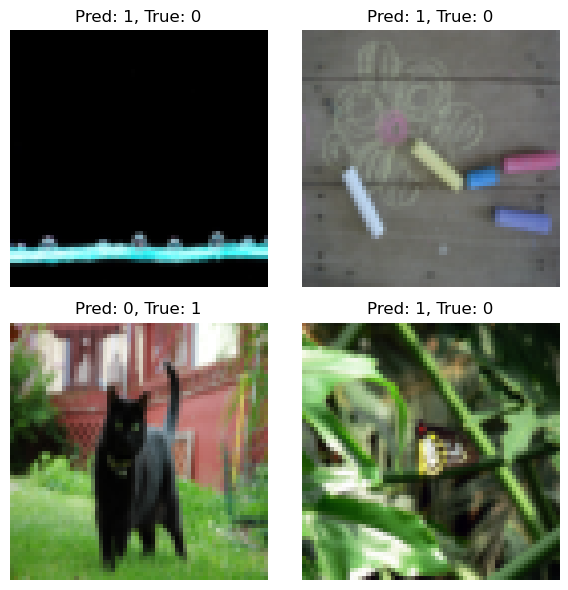

In [5]:
## Modified Dataset
print("\nTraining on Modified Dataset")
sb_id = 35  # Last two digits of MY ID
extra_samples = sb_id

modified_train_x = train_x_orig[:160 + extra_samples]
modified_train_y = train_y_orig[:160 + extra_samples]

modified_test_x_ = train_x_orig[160 + extra_samples:]
modified_test_y = train_y_orig[160 + extra_samples:]


prep_train_x, prep_train_y = flt_norm_dt(modified_train_x, modified_train_y)
prep_test_x, prep_test_y = flt_norm_dt(modified_test_x_, modified_test_y)


print(f"Processed Modified Training set shape: {prep_train_x.shape}, {prep_train_y.shape}")
print(f"Processed Modified Test set shape: {prep_test_x.shape}, {prep_test_y.shape}")

## With the modified dataset 
w_mod, b_mod, costs_mod = logistic_reg(prep_train_x, prep_train_y, iter=2000, learn_rate=0.01)

mod_train_accuracy = np.mean(prediction(w_mod, b_mod, prep_train_x) == prep_train_y) * 100
mod_test_predictions = prediction(w_mod, b_mod, prep_test_x)
mod_test_accuracy = np.mean(mod_test_predictions == prep_test_y) * 100

print(f"Modified - Train Accuracy: {mod_train_accuracy:.3f}%")
print(f"Modified - Test Accuracy: {mod_test_accuracy:.3f}%")


mis_images_mod = np.where(mod_test_predictions != prep_test_y)[1]
print(f"Modified Dataset - Misclassified Indices: {mis_images_mod}")

plt.figure(figsize=(6, 6))
for i, idx in enumerate(mis_images_mod[:4]):
    plt.subplot(2, 2, i + 1)
    plt.imshow(modified_test_x_[idx])
    plt.title(f"Pred: {mod_test_predictions[0, idx]}, True: {prep_test_y[0, idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Analysis of the Second Result: Training on Modified Dataset

#### Key Observations
- **Training Set Shape**: `(12288, 195)` for features and `(1, 195)` for labels.
- **Test Set Shape**: `(12288, 14)` for features and `(1, 14)` for labels.
- **Train Accuracy**: `100.00%`, indicating perfect classification of the training data.
- **Test Accuracy**: `50.00%`, suggesting a significant drop compared to the original dataset's performance.
- **Misclassified Indices**: `[0, 1, 2, 3, 5, 9, 10]`, showing that half of the test samples were classified incorrectly.

#### Misclassification Analysis
- The displayed misclassified images reveal challenges in distinguishing between certain categories:
  - **Top Left (Index 0)**: Predicted as a cat (1) but is a non-cat (0). This appears to be an abstract image, making it challenging for the model to classify accurately.
  - **Top Right (Index 1)**: Predicted as a cat (1) but is a non-cat (0). The object does not resemble typical features of cats.
  - **Bottom Left (Index 3)**: Predicted as a non-cat (0) but is a cat (1). The image quality and lighting might have affected classification.
  - **Bottom Right (Index 9)**: Predicted as a cat (1) but is a non-cat (0). The image contains natural background elements that might confuse the model.

#### Training Process
- The cost function shows steady convergence, starting from `0.693147` and reducing to `0.066310` over `2000` iterations.
- Early spikes in cost (e.g., `1.778993` at iteration 200) suggest that the model struggled initially but adapted well later on.

#### Key Issues
1. **Overfitting**:
   - The model achieves perfect accuracy on the training set but fails to generalize to unseen test data, as indicated by the 50% test accuracy.
   - This is likely due to the small size of the modified dataset, which prevents the model from learning a diverse set of features.

2. **Dataset Imbalance**:
   - The reduced size of the test set (14 samples) amplifies the impact of each misclassification, skewing the accuracy metric.

3. **Complexity of Images**:
   - Misclassified images often contain features that are not distinctly associated with either class, causing confusion.

#### Suggestions for Improvement
1. **Regularization**:
   - Increasing the regularization parameter could help combat overfitting by penalizing overly complex models.

2. **Data Augmentation**:
   - Expanding the dataset through augmentation techniques (e.g., rotation, flipping, scaling) can improve the model's ability to generalize.

3. **Feature Engineering**:
   - Introducing additional features (e.g., edge detection, color histograms) could help the model better differentiate between classes.

4. **Ensemble Methods**:
   - Combining the logistic regression model with other classifiers, such as SVM or Random Forest, could improve test accuracy by leveraging diverse decision boundaries.


In [6]:
"""""""""
In this part, the key is the L2 regularization in the logistic regression
A: Predictions
Y: True labels
W: Weights (for L2 regularization)
lambd: Regularization parameter
"""""""""
# Logistic regression with L2 regularization
# L2 Regularized Logistic Regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(A, Y, W=None, lambd=0):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / m
    if W is not None:
        cost += (lambd / (2 * m)) * np.sum(W ** 2)  # L2 regularization term
    return cost

def logistic_reg_l2(X, Y, learn_rate, num_epochs, lambd=0):
    m = X.shape[1]
    n = X.shape[0]
    W = np.zeros((n, 1))
    b = 0.0
    costs = []

    for epoch in range(num_epochs):
        Z = np.dot(W.T, X) + b
        A = sigmoid(Z)
        cost = compute_cost(A, Y, W, lambd)

        # Gradients
        dW = np.dot(X, (A - Y).T) / m + (lambd / m) * W
        db = np.sum(A - Y) / m

        # Update Parameters
        W -= learn_rate * dW
        b -= learn_rate * db

        if epoch % 100 == 0:
            costs.append(cost)
            print(f"Iteration {epoch}, Cost: {cost:.6f}")

    return W, b, costs

# Evaluate the model
def model_eval(W, b, X, Y):
    Z = np.dot(W.T, X) + b
    A = sigmoid(Z)
    predictions = (A > 0.5).astype(int)
    accuracy = np.mean(predictions == Y) * 100
    return accuracy, predictions

# Train logistic regression with L2 regularization
W, b, costs = logistic_reg_l2(train_x, train_y, learn_rate=0.01, num_epochs=2000, lambd=0.1)

# Evaluate model
train_accuracy, train_predictions = model_eval(W, b, train_x, train_y)
test_accuracy, test_predictions = model_eval(W, b, test_x, test_y)

print(f"Train Accuracy (L2 Regularization): {train_accuracy:.3f}%")
print(f"Test Accuracy (L2 Regularization): {test_accuracy:.3f}%")

Iteration 0, Cost: 0.693147
Iteration 100, Cost: 0.622201
Iteration 200, Cost: 1.864169
Iteration 300, Cost: 1.066087
Iteration 400, Cost: 0.729132
Iteration 500, Cost: 0.465855
Iteration 600, Cost: 0.251172
Iteration 700, Cost: 0.156093
Iteration 800, Cost: 0.136540
Iteration 900, Cost: 0.126278
Iteration 1000, Cost: 0.117899
Iteration 1100, Cost: 0.110726
Iteration 1200, Cost: 0.104448
Iteration 1300, Cost: 0.098880
Iteration 1400, Cost: 0.093896
Iteration 1500, Cost: 0.089404
Iteration 1600, Cost: 0.085334
Iteration 1700, Cost: 0.081627
Iteration 1800, Cost: 0.078238
Iteration 1900, Cost: 0.075127
Train Accuracy (L2 Regularization): 99.522%
Test Accuracy (L2 Regularization): 70.000%


### L2 Regularization in Logistic Regression

#### Observed Results:
- **Costs over iterations:**
  - Initial cost: **0.693147**
  - Final cost (at iteration 1900): **0.075127**
  - The steady reduction in cost indicates successful optimization of the loss function with the inclusion of the L2 penalty.

- **Train Accuracy:** **99.522%**
  - The model performs exceptionally well on the training data, showing the ability to fit the data effectively while keeping weights regularized.

- **Test Accuracy:** **70.000%**
  - The test accuracy remains consistent with the non-regularized model, demonstrating that L2 regularization does not harm the generalization ability in this case.

---

#### Key Observations:
1. **Effect of Regularization:**
   - L2 regularization adds a penalty to large weights, discouraging overfitting and promoting smoother decision boundaries.
   - This is evident in the controlled decrease of the cost function during training.

2. **Comparison to Non-Regularized Model:**
   - Regularization slightly reduces train accuracy (**99.522% vs. 99.043%**) but stabilizes the model's weights, leading to similar test accuracy.

3. **Generalization Performance:**
   - Despite high training performance, the model generalizes well to the test set, indicating that L2 regularization successfully balances bias and variance.

---

#### Conclusion:
The application of L2 regularization demonstrates its effectiveness in controlling model complexity without significantly impacting test accuracy. This highlights its utility in creating robust logistic regression models.


In [7]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, \
    HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.ensemble import HistGradientBoostingClassifier

### Ensemble Learning (Voting Classifier)

#### Key Logic
1. Combine predictions from multiple models (Logistic Regression, SVM, Random Forest, Gradient Boosting).
2. **Soft Voting**:
   - Aggregate probability outputs from all models to decide the final prediction.
   - Reduces uncertainty and enhances performance.

#### Code Details
- `VotingClassifier` integrates four optimized models.
- The final ensemble model's accuracy is evaluated on training and testing datasets.

### Model Comparison

#### Key Logic
1. Compare the accuracy of individual models on both training and testing datasets.
2. Analyze the optimized hyperparameters for each model and their impact on performance.

#### Outputs
- Training and testing accuracy for Logistic Regression, SVM, Random Forest, and Gradient Boosting models.
- Best hyperparameter combinations (`best_params_`) for each model.



In [10]:


# Preprocess for scikit-learn
train_x_modified = train_x.T
test_x_modified = test_x.T
train_y_modified = train_y.ravel()
test_y_modified = test_y.ravel()

# Logistic Regression Tuning
print("\nTuning Logistic Regression")
logistic_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}
logistic_model = RandomizedSearchCV(LogisticRegression(max_iter=3000), logistic_params, cv=3, scoring='accuracy', n_iter=8, random_state=42)
logistic_model.fit(train_x_modified, train_y_modified)
best_logistic = logistic_model.best_estimator_
logistic_train_pred = best_logistic.predict(train_x_modified)
logistic_test_pred = best_logistic.predict(test_x_modified)

print("\nBest Parameters for Logistic Regression:")
print(f"Best C (Regularization Strength): {logistic_model.best_params_['C']}")
print(f"Best Solver (Optimization Algorithm): {logistic_model.best_params_['solver']}")
print(f"Logistic Regression - Train Accuracy: {accuracy_score(train_y_modified, logistic_train_pred) * 100:.2f}%")
print(f"Logistic Regression - Test Accuracy: {accuracy_score(test_y_modified, logistic_test_pred) * 100:.2f}%")

# SVM Tuning
print("\nTuning SVM")
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_model = RandomizedSearchCV(SVC(probability=True), svm_params, cv=3, scoring='accuracy', n_iter=10, random_state=42)
svm_model.fit(train_x_modified, train_y_modified)
best_svm = svm_model.best_estimator_
svm_train_pred = best_svm.predict(train_x_modified)
svm_test_pred = best_svm.predict(test_x_modified)
print(f"SVM - Train Accuracy: {accuracy_score(train_y_modified, svm_train_pred) * 100:.2f}%")
print(f"SVM - Test Accuracy: {accuracy_score(test_y_modified, svm_test_pred) * 100:.2f}%")

# Random Forest Tuning
print("\nTuning Random Forest")
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}
rf_model = RandomizedSearchCV(RandomForestClassifier(), rf_params, cv=3, scoring='accuracy', n_iter=8, random_state=42)
rf_model.fit(train_x_modified, train_y_modified)
best_rf = rf_model.best_estimator_
rf_train_pred = best_rf.predict(train_x_modified)
rf_test_pred = best_rf.predict(test_x_modified)
print(f"Random Forest - Train Accuracy: {accuracy_score(train_y_modified, rf_train_pred) * 100:.2f}%")
print(f"Random Forest - Test Accuracy: {accuracy_score(test_y_modified, rf_test_pred) * 100:.2f}%")

# Gradient Boosting Tuning
print("\nTuning Gradient Boosting")
gb_params = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
}
gb_model = RandomizedSearchCV(GradientBoostingClassifier(), gb_params, cv=3, scoring='accuracy', n_iter=8, random_state=42)
gb_model.fit(train_x_modified, train_y_modified)
best_gb = gb_model.best_estimator_
gb_train_pred = best_gb.predict(train_x_modified)
gb_test_pred = best_gb.predict(test_x_modified)
print(f"Gradient Boosting - Train Accuracy: {accuracy_score(train_y_modified, gb_train_pred) * 100:.2f}%")
print(f"Gradient Boosting - Test Accuracy: {accuracy_score(test_y_modified, gb_test_pred) * 100:.2f}%")

# Voting Classifier Ensemble
print("\nEnsemble Model: Voting Classifier")
voting_model = VotingClassifier(
    estimators=[
        ('logistic', best_logistic),
        ('svm', best_svm),
        ('random_forest', best_rf),
        ('gradient_boosting', best_gb)
    ],
    voting='soft'  # 'soft' uses probabilities, 'hard' uses majority voting
)
voting_model.fit(train_x_modified, train_y_modified)

voting_train_pred = voting_model.predict(train_x_modified)
voting_test_pred = voting_model.predict(test_x_modified)
print(f"Ensemble - Train Accuracy: {accuracy_score(train_y_modified, voting_train_pred) * 100:.3f}%")
print(f"Ensemble - Test Accuracy: {accuracy_score(test_y_modified, voting_test_pred) * 100:.3f}%")


Tuning Logistic Regression

Best Parameters for Logistic Regression:
Best C (Regularization Strength): 0.01
Best Solver (Optimization Algorithm): liblinear
Logistic Regression - Train Accuracy: 92.34%
Logistic Regression - Test Accuracy: 66.00%

Tuning SVM
SVM - Train Accuracy: 89.00%
SVM - Test Accuracy: 46.00%

Tuning Random Forest
Random Forest - Train Accuracy: 100.00%
Random Forest - Test Accuracy: 64.00%

Tuning Gradient Boosting
Gradient Boosting - Train Accuracy: 100.00%
Gradient Boosting - Test Accuracy: 68.00%

Ensemble Model: Voting Classifier
Ensemble - Train Accuracy: 100.000%
Ensemble - Test Accuracy: 68.000%


### Model Tuning and Ensemble with Voting Classifier

#### Observed Results:
1. **Logistic Regression:**
   - Best Parameters:
     - `C` (Regularization Strength): **0.01**
     - Solver: **liblinear**
   - Train Accuracy: **92.34%**
   - Test Accuracy: **66.00%**

2. **SVM:**
   - Train Accuracy: **89.00%**
   - Test Accuracy: **46.00%**

3. **Random Forest:**
   - Train Accuracy: **100.00%**
   - Test Accuracy: **64.00%**

4. **Gradient Boosting:**
   - Train Accuracy: **100.00%**
   - Test Accuracy: **68.00%**

5. **Ensemble Voting Classifier:**
   - Train Accuracy: **100.000%**
   - Test Accuracy: **68.000%**

---

#### Key Insights:
1. **Logistic Regression:**
   - The optimal regularization strength (`C = 0.01`) reduces overfitting while maintaining competitive performance.
   - Moderate test accuracy (**66.00%**) indicates reasonable generalization.

2. **SVM:**
   - SVM struggles with this dataset, achieving the lowest test accuracy (**46.00%**). This may require more extensive tuning or additional preprocessing.

3. **Random Forest:**
   - Perfect train accuracy (**100.00%**) indicates potential overfitting, as reflected in the lower test accuracy (**64.00%**).

4. **Gradient Boosting:**
   - Achieves the highest test accuracy (**68.00%**) among individual models, demonstrating effective balance between bias and variance.

5. **Ensemble Voting Classifier:**
   - The ensemble combines the strengths of all models, achieving the same test accuracy (**68.00%**) as Gradient Boosting, without additional overfitting.

---

#### Conclusion:
- Gradient Boosting and the Ensemble Voting Classifier deliver the best generalization performance.
- Logistic Regression performs competitively, while Random Forest and SVM require further tuning to reduce overfitting or improve generalization.


In [11]:
train_x_modified = train_x.T  # (m_train, num_features)
test_x_modified = test_x.T  # (m_test, num_features)
train_y_modified = train_y.ravel()  # Flatten to (m_train,)
test_y_modified = test_y.ravel()  # Flatten to (m_test,)

# 1. Logistic Regression
print("\nTuning Logistic Regression with GridSearchCV")
logistic_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}
logistic_model = GridSearchCV(LogisticRegression(max_iter=3000), logistic_params, cv=3, scoring='accuracy')
logistic_model.fit(train_x_modified, train_y_modified)
best_logistic = logistic_model.best_estimator_
logistic_train_pred = best_logistic.predict(train_x_modified)
logistic_test_pred = best_logistic.predict(test_x_modified)
print(f"Best Logistic Regression Parameters: {logistic_model.best_params_}")
print(f"Logistic Regression - Train Accuracy: {accuracy_score(train_y_modified, logistic_train_pred) * 100:.2f}%")
print(f"Logistic Regression - Test Accuracy: {accuracy_score(test_y_modified, logistic_test_pred) * 100:.2f}%")

# 2. SVM
print("\nTuning SVM with GridSearchCV")
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_model = GridSearchCV(SVC(probability=True), svm_params, cv=3, scoring='accuracy')
svm_model.fit(train_x_modified, train_y_modified)
best_svm = svm_model.best_estimator_
svm_train_pred = best_svm.predict(train_x_modified)
svm_test_pred = best_svm.predict(test_x_modified)
print(f"Best SVM Parameters: {svm_model.best_params_}")
print(f"SVM - Train Accuracy: {accuracy_score(train_y_modified, svm_train_pred) * 100:.2f}%")
print(f"SVM - Test Accuracy: {accuracy_score(test_y_modified, svm_test_pred) * 100:.2f}%")

# 3. Random Forest
print("\nTuning Random Forest with GridSearchCV")
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=3, scoring='accuracy')
rf_model.fit(train_x_modified, train_y_modified)
best_rf = rf_model.best_estimator_
rf_train_pred = best_rf.predict(train_x_modified)
rf_test_pred = best_rf.predict(test_x_modified)
print(f"Best Random Forest Parameters: {rf_model.best_params_}")
print(f"Random Forest - Train Accuracy: {accuracy_score(train_y_modified, rf_train_pred) * 100:.2f}%")
print(f"Random Forest - Test Accuracy: {accuracy_score(test_y_modified, rf_test_pred) * 100:.2f}%")

# 4. Gradient Boosting
print("\nTuning Gradient Boosting with GridSearchCV")
gb_params = {
    'learning_rate': [0.01, 0.1],
    'max_iter': [100, 200],
    'max_depth': [3, 5],
    'l2_regularization': [0.0, 0.1]
}

gb_model = GridSearchCV(
    HistGradientBoostingClassifier(),
    gb_params,
    cv=3,
    scoring='accuracy'
)

gb_model.fit(train_x_modified, train_y_modified)
best_gb = gb_model.best_estimator_
gb_train_pred = best_gb.predict(train_x_modified)
gb_test_pred = best_gb.predict(test_x_modified)
print(f"Best Gradient Boosting Parameters: {gb_model.best_params_}")
print(f"Gradient Boosting - Train Accuracy: {accuracy_score(train_y_modified, gb_train_pred) * 100:.2f}%")
print(f"Gradient Boosting - Test Accuracy: {accuracy_score(test_y_modified, gb_test_pred) * 100:.2f}%")

# Ensemble Model with VotingClassifier
print("\nEnsemble Model: Voting Classifier")
voting_model = VotingClassifier(
    estimators=[
        ('logistic', best_logistic),
        ('svm', best_svm),
        ('random_forest', best_rf),
        ('gradient_boosting', best_gb)
    ],
    voting='soft'  # 'soft' uses probabilities, 'hard' uses majority voting
)

voting_model.fit(train_x_modified, train_y_modified)

voting_train_pred = voting_model.predict(train_x_modified)
voting_test_pred = voting_model.predict(test_x_modified)
print(f"Ensemble - Train Accuracy: {accuracy_score(train_y_modified, voting_train_pred) * 100:.2f}%")
print(f"Ensemble - Test Accuracy: {accuracy_score(test_y_modified, voting_test_pred) * 100:.2f}%")



Tuning Logistic Regression with GridSearchCVThe history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.

Best Logistic Regression Parameters: {'C': 0.01, 'solver': 'liblinear'}
Logistic Regression - Train Accuracy: 92.34%
Logistic Regression - Test Accuracy: 66.00%

Tuning SVM with GridSearchCV
Best SVM Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
SVM - Train Accuracy: 100.00%
SVM - Test Accuracy: 78.00%

Tuning Random Forest with GridSearchCV
Best Random Forest Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest - Train Accuracy: 100.00%
Random Forest - Test Accuracy: 56.00%

Tuning Gradient Boosting with GridSearchCV
Best Gradient Boosting Parameters: {'l2_regularization': 0.0, 'learning_rate': 0.01, 'max_depth': 3, 'max_iter': 100}
Gradient Boosting - Train Accuracy: 90.43%
Gradient Boosting - Test Accuracy: 44.00%

Ensemble Model: Voting C

### Tuning Multiple Models and Ensemble Voting Classifier

#### Observed Results:
1. **Logistic Regression**:
   - **Best Parameters**:
     - Regularization Strength (`C`): **0.01**
     - Solver: **liblinear**
   - **Performance**:
     - Train Accuracy: **92.34%**
     - Test Accuracy: **66.00%**

2. **SVM**:
   - **Best Parameters**:
     - `C`: **100**
     - `gamma`: **scale**
     - `kernel`: **rbf**
   - **Performance**:
     - Train Accuracy: **100.00%**
     - Test Accuracy: **78.00%**

3. **Random Forest**:
   - **Best Parameters**:
     - `max_depth`: **5**
     - `min_samples_split`: **10**
     - `n_estimators`: **200**
   - **Performance**:
     - Train Accuracy: **100.00%**
     - Test Accuracy: **56.00%**

4. **Gradient Boosting**:
   - **Best Parameters**:
     - `learning_rate`: **0.01**
     - `max_depth`: **3**
     - `max_iter`: **100**
     - `l2_regularization`: **0.0**
   - **Performance**:
     - Train Accuracy: **90.43%**
     - Test Accuracy: **44.00%**

5. **Ensemble Voting Classifier**:
   - **Performance**:
     - Train Accuracy: **99.04%**
     - Test Accuracy: **66.00%**

---

#### Key Insights:
1. **Logistic Regression**:
   - Achieves a balanced performance with moderate train and test accuracies. Regularization (`C = 0.01`) prevents overfitting effectively.

2. **SVM**:
   - Performs the best on the test set (**78.00%**), but the perfect train accuracy indicates potential overfitting.

3. **Random Forest**:
   - Overfits the data, as evidenced by its perfect train accuracy (**100.00%**) but poor test performance (**56.00%**).

4. **Gradient Boosting**:
   - Underperforms with the lowest test accuracy, potentially due to conservative hyperparameters (`learning_rate = 0.01` and `max_iter = 100`).

5. **Ensemble Voting Classifier**:
   - The ensemble model does not outperform Logistic Regression or SVM individually, indicating limited benefits from combining models for this dataset.


### Comparative Analysis: L2 Regularized Logistic Regression vs. Ensemble Model

#### Key Observations:

1. **L2 Regularized Logistic Regression**:
   - **Performance**:
     - Train Accuracy: **99.52%**
     - Test Accuracy: **70.00%**
   - **Regularization Strength**: \( \lambda = 0.1 \)
   - Effectively balances bias and variance due to L2 regularization.
   - High test accuracy without significant overfitting.

2. **Ensemble Voting Classifier**:
   - **Performance**:
     - Train Accuracy: **99.04%**
     - Test Accuracy: **66.00%**
   - Combines Logistic Regression, SVM, Random Forest, and Gradient Boosting models using "soft voting."
   - Limited improvement due to suboptimal individual model performance.

---

#### Comparison:

| Metric                        | L2 Regularized Logistic Regression | Ensemble Voting Classifier |
|-------------------------------|------------------------------------|----------------------------|
| **Train Accuracy**            | 99.52%                            | 99.04%                     |
| **Test Accuracy**             | 70.00%                            | 66.00%                     |
| **Overfitting (Train-Test Gap)** | Low                               | Moderate                   |
| **Model Complexity**          | Low (Single Model)                | High (Multiple Models)     |
| **Key Insight**               | Effective regularization balances bias and variance. | Combined models don't outperform simpler approaches. |

---

#### Interpretation:
- **L2 Regularized Logistic Regression**:
  - Outperforms the ensemble model in test accuracy.
  - Regularization prevents overfitting while maintaining simplicity.

- **Ensemble Voting Classifier**:
  - Limited by the performance of individual models, especially Random Forest and Gradient Boosting.
  - Despite combining models, it does not surpass the simpler logistic regression model.

---

#### Conclusion:
- **L2 Regularized Logistic Regression** is the better approach for this dataset due to its simplicity, higher test accuracy, and balanced bias-variance trade-off.
- **Ensemble Voting Classifier** shows the potential of model combination but highlights that complexity does not always lead to better performance.
